# Intro

## Importar

In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_parquet('/content/drive/MyDrive/orga/04 - Organización de Datos/TP2/train_cleaned.parq')
X_test_original = pd.read_parquet('/content/drive/MyDrive/orga/04 - Organización de Datos/TP2/test.parq')

Divido el DataFrame en batches de 100k. Luego le aplico drop_duplicates a cada batch. Finalmente uno todo el DF.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40671582 entries, 0 to 40671581
Data columns (total 13 columns):
 #   Column             Dtype   
---  ------             -----   
 0   watcher_country    category
 1   watcher_as_num     float32 
 2   watcher_as_name    category
 3   attacker_country   category
 4   attacker_as_num    float32 
 5   attacker_as_name   category
 6   attack_type        object  
 7   watcher_uuid_enum  int32   
 8   attacker_ip_enum   int32   
 9   label              int8    
 10  service_type       object  
 11  hour               int64   
 12  day                int64   
dtypes: category(4), float32(2), int32(2), int64(2), int8(1), object(2)
memory usage: 2.2+ GB


In [ ]:
df

,watcher_country,watcher_as_num,watcher_as_name,attacker_country,attacker_as_num,attacker_as_name,attack_type,watcher_uuid_enum,attacker_ip_enum,label,service_type,hour,day
0,DE,34011.0,Host Europe GmbH,TR,47721.0,Murat Aktas,exploit,0,6466,0,http,7,0
1,DE,34011.0,Host Europe GmbH,TR,47721.0,Murat Aktas,spam,0,6466,0,http,7,0
2,DE,20886.0,bn:t Blatzheim Networks Telecom GmbH,DE,51167.0,Contabo GmbH,bruteforce,2,4637,0,http,7,0
3,DE,20886.0,bn:t Blatzheim Networks Telecom GmbH,DE,51167.0,Contabo GmbH,spam,2,4637,0,http,7,0
4,DE,20886.0,bn:t Blatzheim Networks Telecom GmbH,DE,51167.0,Contabo GmbH,exploit,2,4637,0,http,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40671577,US,22611.0,INMOTION,US,7018.0,ATT-INTERNET4,scan,9606,191439,0,http,21,3
40671578,US,22611.0,INMOTION,US,7018.0,ATT-INTERNET4,exploit,9606,191439,0,http,21,3
40671579,DE,12897.0,ENTEGA Medianet GmbH,DE,3209.0,Vodafone GmbH,scan,24879,190784,0,http,21,3
40671580,US,22612.0,NAMECHEAP-NET,US,23033.0,WOW,scan,40383,193446,0,http,21,3


## Limpieza en df

df_ tiene mitad label 1 y mitad label 0. Se dropean las columnas as num ya que representan lo mismo que las as name

In [ ]:
df_0 = df[df['label'] == 0]
df_1 = df[df['label'] == 1]

In [ ]:
random.seed(13)
sample_size = len(df_1) * 5
df_ = df_0.sample(sample_size, random_state=13)

df_ = pd.concat([df_, df_1], ignore_index=True)

In [ ]:
df_ = df_.drop('attacker_as_num', axis=1)
df_ = df_.drop('watcher_as_num', axis=1)

In [ ]:
df_

,watcher_country,watcher_as_name,attacker_country,attacker_as_name,attack_type,watcher_uuid_enum,attacker_ip_enum,label,service_type,hour,day
0,DE,ENTEGA Medianet GmbH,DE,Deutsche Telekom AG,spam,24879,51954,0,http,21,2
1,US,IMH-IAD,US,TWC-10796-MIDWEST,scan,12159,177970,0,http,23,4
2,FR,OVH SAS,US,WOW,spam,30072,130743,0,http,0,0
3,US,UNIFIEDLAYER-AS-1,US,Delis LLC,spam,46212,87100,0,http,8,3
4,SG,GOOGLE,SG,AMAZON-02,scan,307,78586,0,http,5,0
...,...,...,...,...,...,...,...,...,...,...,...
4337593,DE,Strato AG,SG,DIGITALOCEAN-ASN,scan,25180,193313,1,http,21,3
4337594,US,LIQUIDWEB,US,QUINTEX,exploit,25685,198558,1,http,21,3
4337595,US,LIQUIDWEB,US,QUINTEX,spam,25685,198558,1,http,21,3
4337596,DK,One.com A/S,SG,DIGITALOCEAN-ASN,scan,24258,193313,1,http,21,3


## Limpieza en test

In [ ]:
X_test = X_test_original.copy()

In [ ]:
X_test[['service_type', 'attack_type']] =  X_test['attack_type'].str.split(':', 1, expand=True)

<ipython-input-11-b969b2c37afb>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  X_test[['service_type', 'attack_type']] =  X_test['attack_type'].str.split(':', 1, expand=True)


In [ ]:
X_test['attack_time'] = pd.to_datetime(X_test['attack_time'])

In [ ]:
X_test = X_test.drop('attacker_as_num', axis=1)
X_test = X_test.drop('watcher_as_num', axis=1)

In [ ]:
X_test['hour'] = X_test['attack_time'].dt.hour
X_test['day'] = X_test['attack_time'].map(lambda x: x.weekday())

In [ ]:
X_test = X_test.drop(columns=['attack_time'])

In [ ]:
if X_test['watcher_country'].isna().any():
    X_test['watcher_country'] = X_test['watcher_country'].cat.add_categories("unknown")
    X_test['watcher_country'].fillna("unknown", inplace=True)
if X_test['watcher_as_name'].isna().any():
    X_test['watcher_as_name'] = X_test['watcher_as_name'].cat.add_categories("unknown")
    X_test['watcher_as_name'].fillna("unknown", inplace=True)
if X_test['attacker_country'].isna().any():
    X_test['attacker_country'] = X_test['attacker_country'].cat.add_categories("unknown")
    X_test['attacker_country'].fillna("unknown", inplace=True)
if X_test['attacker_as_name'].isna().any():
    X_test['attacker_as_name'] = X_test['attacker_as_name'].cat.add_categories("unknown")
    X_test['attacker_as_name'].fillna("unknown", inplace=True)

In [ ]:
X_test.count()

watcher_country      18682297
watcher_as_name      18682297
attacker_country     18682297
attacker_as_name     18682297
attack_type          18682297
watcher_uuid_enum    18682297
attacker_ip_enum     18682297
service_type         18682297
hour                 18682297
day                  18682297
dtype: int64

# Featuring

## Feature Top combinacion Hora x Watcher Country

In [ ]:
df_1 = df_[df_['label'] == 1]

In [ ]:
top_5_countries = df_1['watcher_country'].value_counts().nlargest(5).index

In [ ]:
top_5_countries

CategoricalIndex(['US', 'DE', 'FR', 'GB', 'NL'], categories=['AD', 'AE', 'AL', 'AM', ..., 'VI', 'VN', 'ZA', 'unknown'], ordered=False, dtype='category')

In [ ]:
top_6_hour = df_1['hour'].value_counts().nlargest(6).index

In [ ]:
top_6_hour

Int64Index([10, 8, 9, 7, 11, 12], dtype='int64')

In [ ]:
df_['combined_watcher_hour'] = df_.apply(lambda row: f"{row['watcher_country']}_{row['hour']}"
                                     if row['watcher_country'] in top_5_countries
                                        and row['hour'] in top_6_hour
                                     else 'Other', axis=1)

In [ ]:
filas_con_nan = df_[df_['combined_watcher_hour'].isna()]
filas_con_nan

,watcher_country,watcher_as_name,attacker_country,attacker_as_name,attack_type,watcher_uuid_enum,attacker_ip_enum,label,service_type,hour,day,combined_watcher_hour


In [ ]:
df_

,watcher_country,watcher_as_name,attacker_country,attacker_as_name,attack_type,watcher_uuid_enum,attacker_ip_enum,label,service_type,hour,day,combined_watcher_hour
0,DE,ENTEGA Medianet GmbH,DE,Deutsche Telekom AG,spam,24879,51954,0,http,21,2,Other
1,US,IMH-IAD,US,TWC-10796-MIDWEST,scan,12159,177970,0,http,23,4,Other
2,FR,OVH SAS,US,WOW,spam,30072,130743,0,http,0,0,Other
3,US,UNIFIEDLAYER-AS-1,US,Delis LLC,spam,46212,87100,0,http,8,3,US_8
4,SG,GOOGLE,SG,AMAZON-02,scan,307,78586,0,http,5,0,Other
...,...,...,...,...,...,...,...,...,...,...,...,...
4337593,DE,Strato AG,SG,DIGITALOCEAN-ASN,scan,25180,193313,1,http,21,3,Other
4337594,US,LIQUIDWEB,US,QUINTEX,exploit,25685,198558,1,http,21,3,Other
4337595,US,LIQUIDWEB,US,QUINTEX,spam,25685,198558,1,http,21,3,Other
4337596,DK,One.com A/S,SG,DIGITALOCEAN-ASN,scan,24258,193313,1,http,21,3,Other


In [ ]:
X_test['combined_watcher_hour'] = X_test.apply(lambda row: f"{row['watcher_country']}_{row['hour']}"
                                     if row['watcher_country'] in top_5_countries
                                        and row['hour'] in top_6_hour
                                     else 'Other', axis=1)

In [ ]:
X_test

,watcher_country,watcher_as_name,attacker_country,attacker_as_name,attack_type,watcher_uuid_enum,attacker_ip_enum,service_type,hour,day,combined_watcher_hour
0,US,IMH-IAD,IN,DIGITALOCEAN-ASN,spam,1,7696,http,7,0,US_7
1,US,IMH-IAD,IN,DIGITALOCEAN-ASN,exploit,1,7696,http,7,0,US_7
2,US,IMH-IAD,IN,DIGITALOCEAN-ASN,bruteforce,1,7696,http,7,0,US_7
3,US,IMH-IAD,IN,DIGITALOCEAN-ASN,bruteforce,1,7696,http,7,0,US_7
4,US,GOOGLE-CLOUD-PLATFORM,US,PONYNET,bruteforce,3,7543,http,7,0,US_7
...,...,...,...,...,...,...,...,...,...,...,...
18682292,DE,ENTEGA Medianet GmbH,DE,Deutsche Telekom AG,scan,24879,198081,http,21,3,Other
18682293,DE,ENTEGA Medianet GmbH,DE,Deutsche Telekom AG,scan,24879,198081,http,21,3,Other
18682294,DE,ENTEGA Medianet GmbH,DE,Deutsche Telekom AG,scan,24879,198081,http,21,3,Other
18682295,DE,ENTEGA Medianet GmbH,DE,Deutsche Telekom AG,scan,24879,198081,http,21,3,Other


## Feature Top combinacion Hora x Attacker Country

In [ ]:
df_1 = df_[df_['label'] == 1]

In [ ]:
top_5_countries = df_1['attacker_country'].value_counts().nlargest(5).index

In [ ]:
top_5_countries

CategoricalIndex(['US', 'CA', 'RU', 'SG', 'DE'], categories=['AD', 'AE', 'AF', 'AG', ..., 'ZA', 'ZM', 'ZW', 'unknown'], ordered=False, dtype='category')

In [ ]:
top_6_hour = df_1['hour'].value_counts().nlargest(6).index

In [ ]:
top_6_hour

Int64Index([10, 8, 9, 7, 11, 12], dtype='int64')

In [ ]:
df_['combined_attacker_hour'] = df_.apply(lambda row: f"{row['attacker_country']}_{row['hour']}"
                                     if row['attacker_country'] in top_5_countries
                                        and row['hour'] in top_6_hour
                                     else 'Other', axis=1)

In [ ]:
filas_con_nan = df_[df_['combined_attacker_hour'].isna()]
filas_con_nan

,watcher_country,watcher_as_name,attacker_country,attacker_as_name,attack_type,watcher_uuid_enum,attacker_ip_enum,label,service_type,hour,day,combined_watcher_hour,combined_attacker_hour


In [ ]:
df_

,watcher_country,watcher_as_name,attacker_country,attacker_as_name,attack_type,watcher_uuid_enum,attacker_ip_enum,label,service_type,hour,day,combined_watcher_hour,combined_attacker_hour
0,DE,ENTEGA Medianet GmbH,DE,Deutsche Telekom AG,spam,24879,51954,0,http,21,2,Other,Other
1,US,IMH-IAD,US,TWC-10796-MIDWEST,scan,12159,177970,0,http,23,4,Other,Other
2,FR,OVH SAS,US,WOW,spam,30072,130743,0,http,0,0,Other,Other
3,US,UNIFIEDLAYER-AS-1,US,Delis LLC,spam,46212,87100,0,http,8,3,US_8,US_8
4,SG,GOOGLE,SG,AMAZON-02,scan,307,78586,0,http,5,0,Other,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4337593,DE,Strato AG,SG,DIGITALOCEAN-ASN,scan,25180,193313,1,http,21,3,Other,Other
4337594,US,LIQUIDWEB,US,QUINTEX,exploit,25685,198558,1,http,21,3,Other,Other
4337595,US,LIQUIDWEB,US,QUINTEX,spam,25685,198558,1,http,21,3,Other,Other
4337596,DK,One.com A/S,SG,DIGITALOCEAN-ASN,scan,24258,193313,1,http,21,3,Other,Other


In [ ]:
X_test['combined_attacker_hour'] = X_test.apply(lambda row: f"{row['attacker_country']}_{row['hour']}"
                                     if row['attacker_country'] in top_5_countries
                                        and row['hour'] in top_6_hour
                                     else 'Other', axis=1)

In [ ]:
X_test

,watcher_country,watcher_as_name,attacker_country,attacker_as_name,attack_type,watcher_uuid_enum,attacker_ip_enum,service_type,hour,day,combined_watcher_hour,combined_attacker_hour
0,US,IMH-IAD,IN,DIGITALOCEAN-ASN,spam,1,7696,http,7,0,US_7,Other
1,US,IMH-IAD,IN,DIGITALOCEAN-ASN,exploit,1,7696,http,7,0,US_7,Other
2,US,IMH-IAD,IN,DIGITALOCEAN-ASN,bruteforce,1,7696,http,7,0,US_7,Other
3,US,IMH-IAD,IN,DIGITALOCEAN-ASN,bruteforce,1,7696,http,7,0,US_7,Other
4,US,GOOGLE-CLOUD-PLATFORM,US,PONYNET,bruteforce,3,7543,http,7,0,US_7,US_7
...,...,...,...,...,...,...,...,...,...,...,...,...
18682292,DE,ENTEGA Medianet GmbH,DE,Deutsche Telekom AG,scan,24879,198081,http,21,3,Other,Other
18682293,DE,ENTEGA Medianet GmbH,DE,Deutsche Telekom AG,scan,24879,198081,http,21,3,Other,Other
18682294,DE,ENTEGA Medianet GmbH,DE,Deutsche Telekom AG,scan,24879,198081,http,21,3,Other,Other
18682295,DE,ENTEGA Medianet GmbH,DE,Deutsche Telekom AG,scan,24879,198081,http,21,3,Other,Other


## Feature Attacker Country

recategorizo los paises por:


1.   Si es USA
2.   Si está en el top 5 de los label 1
3.   Si está en el top 10 de los label 1

En este caso, hay diferencias significativas en los top attacker country de cada label. Por ejemplo, en el caso de CA, en los label 1 representa mas del 12% de los ataques, mientras que en el label 0 menos del 5%.

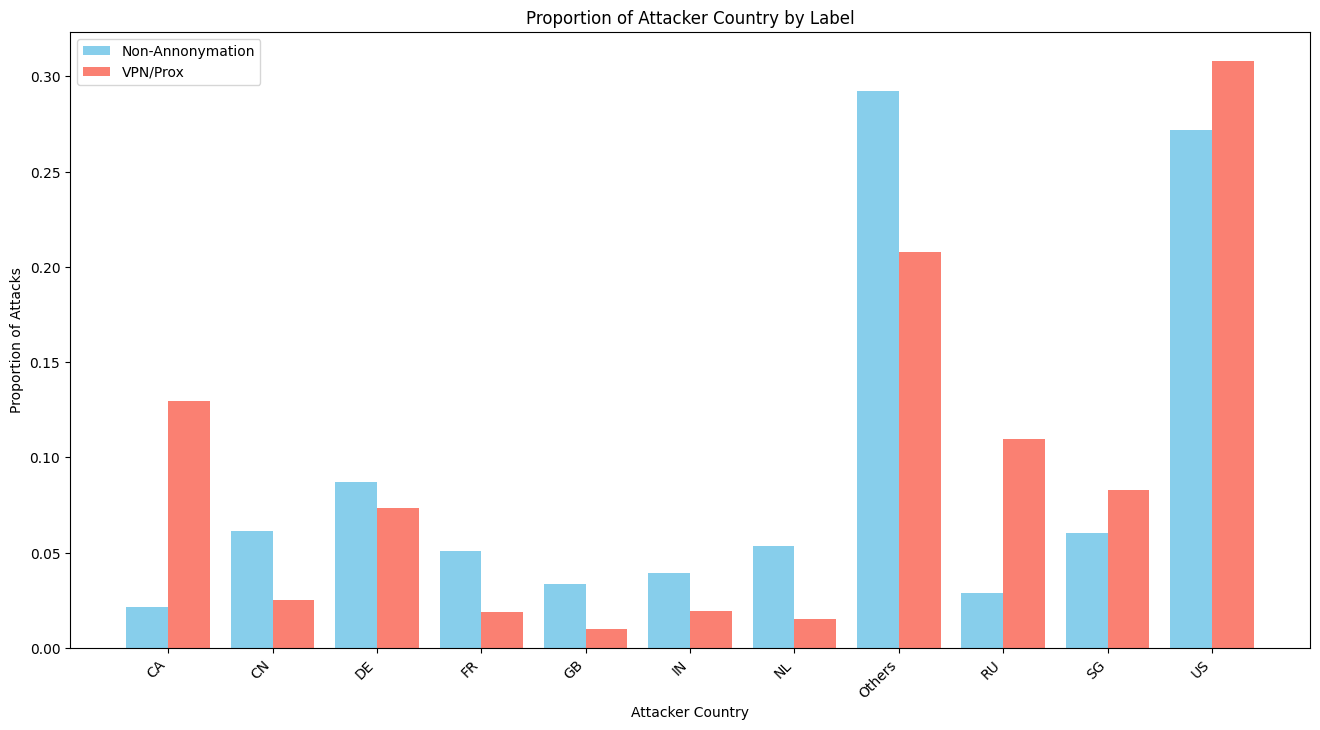


In [ ]:
us = ['US']
top_5 = df_1['attacker_country'].value_counts().nlargest(5).index
top_10 = df_1['attacker_country'].value_counts().nlargest(10).index

In [ ]:
list(top_5)

['US', 'CA', 'RU', 'SG', 'DE']

In [ ]:
list(top_10)

['US', 'CA', 'RU', 'SG', 'DE', 'AU', 'CN', 'IN', 'FR', 'NL']

In [ ]:
top_5_0 = df_0['attacker_country'].value_counts().nlargest(5).index
top_10_0 = df_0['attacker_country'].value_counts().nlargest(10).index

In [ ]:
list(top_5_0)

['US', 'DE', 'CN', 'SG', 'NL']

In [ ]:
list(top_10_0)

['US', 'DE', 'CN', 'SG', 'NL', 'FR', 'IN', 'GB', 'RU', 'VN']

In [ ]:
def categorize_country(x):
    if x in us:
        return x
    elif x in top_5 and x not in us:
        return 'top5'
    elif x in top_10 and x not in top_5:
        return 'top10'
    else:
        return 'other'

In [ ]:
df_['attacker_country'] = df_['attacker_country'].apply(categorize_country)

In [ ]:
X_test['attacker_country'] = X_test['attacker_country'].apply(categorize_country)

## Feature Watcher Country

recategorizo los paises por:


1.   Si es USA
2.   Si está en el top 5 de los label 1
3.   Si está en el top 10 de los label 1

En este caso, solo se diferencia de un país en el top 10

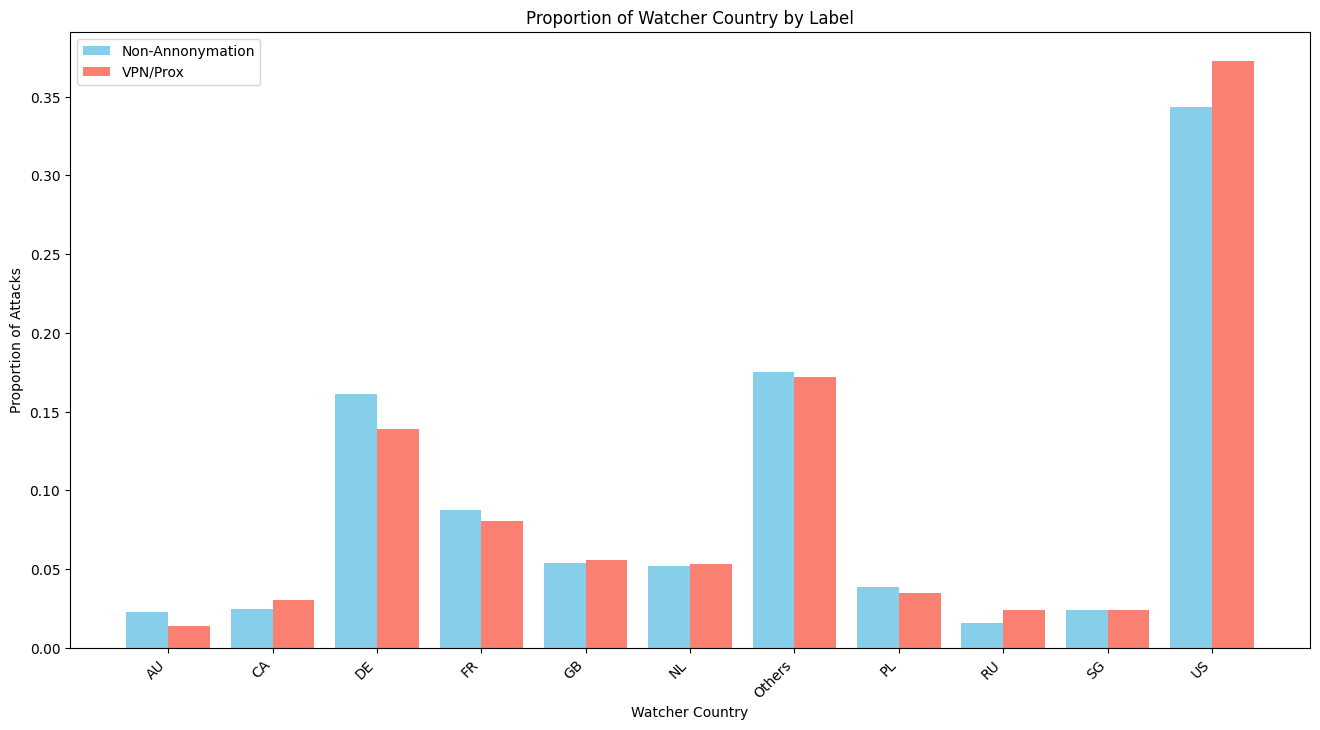


In [ ]:
df_1 = df_[df_['label'] == 1]

In [ ]:
df_0 = df_[df_['label'] == 0]

In [ ]:
us = ['US']
top_5 = df_1['watcher_country'].value_counts().nlargest(5).index
top_10 = df_1['watcher_country'].value_counts().nlargest(10).index

In [ ]:
list(top_5)

['US', 'DE', 'FR', 'GB', 'NL']

In [ ]:
list(top_10)

['US', 'DE', 'FR', 'GB', 'NL', 'PL', 'CA', 'SG', 'RU', 'BE']

In [ ]:
top_5_0 = df_0['watcher_country'].value_counts().nlargest(5).index
top_10_0 = df_0['watcher_country'].value_counts().nlargest(10).index

In [ ]:
list(top_5_0)

['US', 'DE', 'FR', 'GB', 'NL']

In [ ]:
list(top_10_0)

['US', 'DE', 'FR', 'GB', 'NL', 'PL', 'CA', 'SG', 'AU', 'RU']

In [ ]:
def categorize_country(x):
    if x in us:
        return x
    elif x in top_5 and x not in us:
        return 'top5'
    elif x in top_10 and x not in top_5:
        return 'top10'
    else:
        return 'other'

In [ ]:
df_['watcher_country'] = df_['watcher_country'].apply(categorize_country)

In [ ]:
X_test['watcher_country'] = X_test['watcher_country'].apply(categorize_country)

## Feature hour

Agrupo la hora en rangos de acuerdo a la mayor cantidad de ataques en el label 1

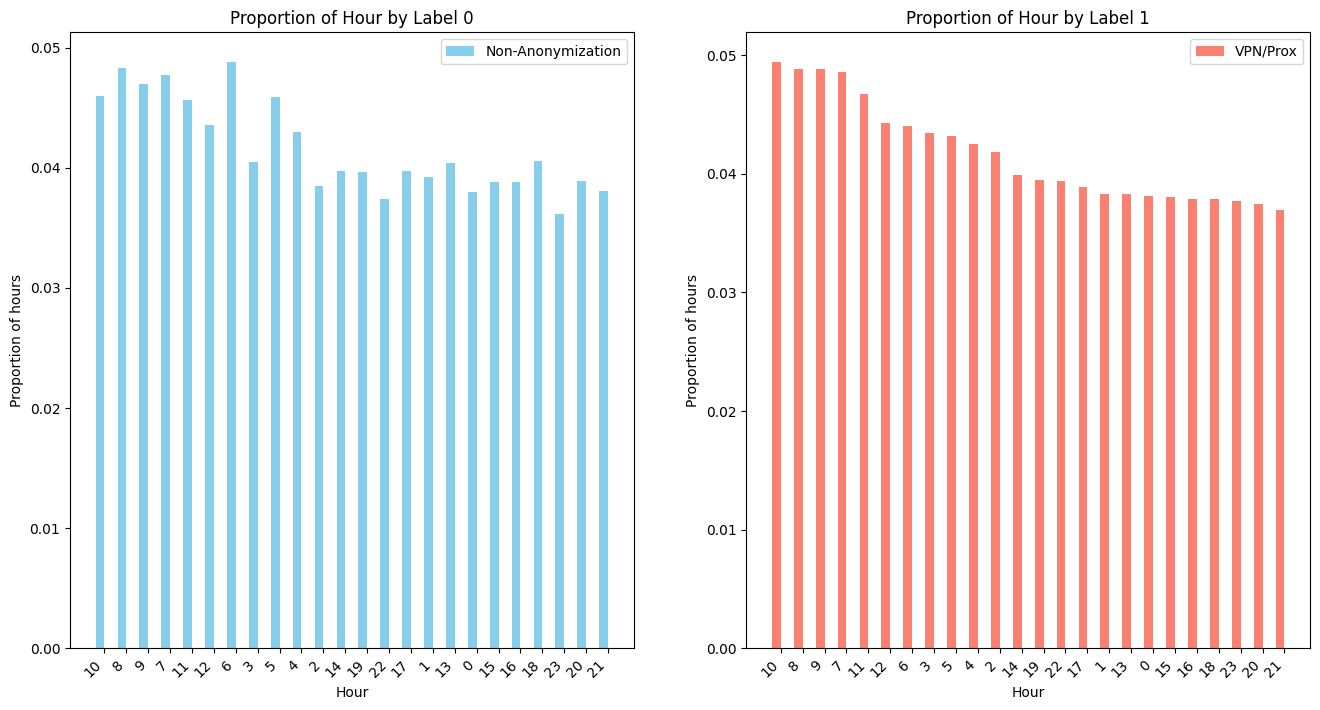

In [ ]:
top_6 = df_1['hour'].value_counts().nlargest(6).index
top_12 = df_1['hour'].value_counts().nlargest(12).index
top_18 = df_1['hour'].value_counts().nlargest(18).index
top_24 = df_1['hour'].value_counts().nlargest(24).index

list(top_24)

[10,
 8,
 9,
 7,
 11,
 12,
 6,
 3,
 5,
 4,
 2,
 14,
 19,
 22,
 17,
 1,
 13,
 0,
 15,
 16,
 18,
 23,
 20,
 21]

In [ ]:
def asignar_valor(hour):
    if hour in top_6:
        return 0
    elif hour in top_12 and not hour in top_6:
        return 1
    elif hour in top_18 and not hour in top_12:
        return 2
    elif hour in top_24 and not hour in top_18:
        return 3
    else:
        return None

df_['hour'] = df_['hour'].apply(asignar_valor)
X_test['hour'] = X_test['hour'].apply(asignar_valor)

In [ ]:
df_

,watcher_country,watcher_as_name,attacker_country,attacker_as_name,attack_type,watcher_uuid_enum,attacker_ip_enum,label,service_type,hour,day,combined_watcher_hour,combined_attacker_hour
0,top5,ENTEGA Medianet GmbH,top5,Deutsche Telekom AG,spam,24879,51954,0,http,3,2,Other,Other
1,US,IMH-IAD,US,TWC-10796-MIDWEST,scan,12159,177970,0,http,3,4,Other,Other
2,top5,OVH SAS,US,WOW,spam,30072,130743,0,http,2,0,Other,Other
3,US,UNIFIEDLAYER-AS-1,US,Delis LLC,spam,46212,87100,0,http,0,3,US_8,US_8
4,top10,GOOGLE,top5,AMAZON-02,scan,307,78586,0,http,1,0,Other,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4337593,top5,Strato AG,top5,DIGITALOCEAN-ASN,scan,25180,193313,1,http,3,3,Other,Other
4337594,US,LIQUIDWEB,US,QUINTEX,exploit,25685,198558,1,http,3,3,Other,Other
4337595,US,LIQUIDWEB,US,QUINTEX,spam,25685,198558,1,http,3,3,Other,Other
4337596,other,One.com A/S,top5,DIGITALOCEAN-ASN,scan,24258,193313,1,http,3,3,Other,Other


## Feature attack type

Me quedo con los 4 ataques mas comunes determinados por el visus frequencia de attaque por label

In [ ]:
top_attack_type = df_['attack_type'].value_counts().nlargest(4).index

In [ ]:
df_['attack_type'] = pd.Categorical(df_['attack_type'], categories=top_attack_type, ordered=True)
df_['attack_type'] = pd.Categorical(df_['attack_type'].cat.add_categories("other"))
df_['attack_type'] = df_['attack_type'].fillna("other")

In [ ]:
X_test['attack_type'] = pd.Categorical(X_test['attack_type'], categories=top_attack_type, ordered=True)
X_test['attack_type'] = pd.Categorical(X_test['attack_type'].cat.add_categories("other"))
X_test['attack_type'] = X_test['attack_type'].fillna("other")

In [ ]:
df_

,watcher_country,watcher_as_name,attacker_country,attacker_as_name,attack_type,watcher_uuid_enum,attacker_ip_enum,label,service_type,hour,day,combined_watcher_hour,combined_attacker_hour
0,top5,ENTEGA Medianet GmbH,top5,Deutsche Telekom AG,spam,24879,51954,0,http,3,2,Other,Other
1,US,IMH-IAD,US,TWC-10796-MIDWEST,scan,12159,177970,0,http,3,4,Other,Other
2,top5,OVH SAS,US,WOW,spam,30072,130743,0,http,2,0,Other,Other
3,US,UNIFIEDLAYER-AS-1,US,Delis LLC,spam,46212,87100,0,http,0,3,US_8,US_8
4,top10,GOOGLE,top5,AMAZON-02,scan,307,78586,0,http,1,0,Other,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4337593,top5,Strato AG,top5,DIGITALOCEAN-ASN,scan,25180,193313,1,http,3,3,Other,Other
4337594,US,LIQUIDWEB,US,QUINTEX,exploit,25685,198558,1,http,3,3,Other,Other
4337595,US,LIQUIDWEB,US,QUINTEX,spam,25685,198558,1,http,3,3,Other,Other
4337596,other,One.com A/S,top5,DIGITALOCEAN-ASN,scan,24258,193313,1,http,3,3,Other,Other


## Feature service type

Me quedo con el top 2 de servicios y agrupo los otros en una nueva categoría

In [ ]:
top_service_type = df_['service_type'].value_counts().nlargest(2).index

In [ ]:
df_['service_type'] = pd.Categorical(df_['service_type'], categories=top_service_type, ordered=True)
df_['service_type'] = pd.Categorical(df_['service_type'].cat.add_categories("other"))
df_['service_type'] = df_['service_type'].fillna("other")

In [ ]:
X_test['service_type'] = pd.Categorical(X_test['service_type'], categories=top_service_type, ordered=True)
X_test['service_type'] = pd.Categorical(X_test['service_type'].cat.add_categories("other"))
X_test['service_type'] = X_test['service_type'].fillna("other")

In [ ]:
df_

,watcher_country,watcher_as_name,attacker_country,attacker_as_name,attack_type,watcher_uuid_enum,attacker_ip_enum,label,service_type,hour,day,combined_watcher_hour,combined_attacker_hour
0,top5,ENTEGA Medianet GmbH,top5,Deutsche Telekom AG,spam,24879,51954,0,http,3,2,Other,Other
1,US,IMH-IAD,US,TWC-10796-MIDWEST,scan,12159,177970,0,http,3,4,Other,Other
2,top5,OVH SAS,US,WOW,spam,30072,130743,0,http,2,0,Other,Other
3,US,UNIFIEDLAYER-AS-1,US,Delis LLC,spam,46212,87100,0,http,0,3,US_8,US_8
4,top10,GOOGLE,top5,AMAZON-02,scan,307,78586,0,http,1,0,Other,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4337593,top5,Strato AG,top5,DIGITALOCEAN-ASN,scan,25180,193313,1,http,3,3,Other,Other
4337594,US,LIQUIDWEB,US,QUINTEX,exploit,25685,198558,1,http,3,3,Other,Other
4337595,US,LIQUIDWEB,US,QUINTEX,spam,25685,198558,1,http,3,3,Other,Other
4337596,other,One.com A/S,top5,DIGITALOCEAN-ASN,scan,24258,193313,1,http,3,3,Other,Other


## Feature attacker AS name

In [ ]:
df_1 = df_[df_['label'] == 1]

In [ ]:
top_countries = df_1['watcher_as_name'].value_counts().nlargest(20).index

In [ ]:
df_['watcher_as_name'] = df_['watcher_as_name'].apply(lambda x: 'top' if x in top_countries else 'other')
X_test['watcher_as_name'] = X_test['watcher_as_name'].apply(lambda x: 'top' if x in top_countries else 'other')

## Feature watcher AS name

In [ ]:
#df_1 = df_[df_['label'] == 1]

In [ ]:
#top_countries = df_1['attacker_as_name'].value_counts().nlargest(20).index

In [ ]:
#df_['attacker_as_name'] = df_['attacker_as_name'].apply(lambda x: 'top' if x in top_countries else 'other')
#X_test['attacker_as_name'] = X_test['attacker_as_name'].apply(lambda x: 'top' if x in top_countries else 'other')

# Enconding

## División de dfs

In [ ]:
df_ = df_.drop('watcher_uuid_enum', axis=1)

In [ ]:
X = df_.drop('label', axis=1)
y = df_['label']

In [ ]:
unique_ips = X['attacker_ip_enum'].unique()
pd.DataFrame(unique_ips).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126714 entries, 0 to 126713
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   0       126714 non-null  int32
dtypes: int32(1)
memory usage: 495.1 KB


In [ ]:
ips_train, ips_validation = train_test_split(unique_ips, test_size=0.3, random_state=13)

In [ ]:
X_train = X[X['attacker_ip_enum'].isin(ips_train)]
X_validation = X[X['attacker_ip_enum'].isin(ips_validation)]

y_train = y[X_train.index]
y_validation = y[X_validation.index]

In [ ]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.6 MB/s eta 0:00:00


In [ ]:
X_train

,watcher_country,watcher_as_name,attacker_country,attacker_as_name,attack_type,attacker_ip_enum,service_type,hour,day,combined_watcher_hour,combined_attacker_hour
0,top5,other,top5,Deutsche Telekom AG,spam,51954,http,3,2,Other,Other
3,US,top,US,Delis LLC,spam,87100,http,0,3,US_8,US_8
7,top10,top,other,Fastweb,exploit,1174,http,1,5,Other,Other
8,top5,top,US,UNIFIEDLAYER-AS-1,exploit,156846,http,1,6,Other,Other
10,top10,other,other,"DSI DATA, a. s.",spam,108027,http,1,5,Other,Other
...,...,...,...,...,...,...,...,...,...,...,...
4337589,top5,other,top5,AS-COLOCROSSING,other,196741,other,0,2,FR_9,CA_9
4337590,top5,other,top10,SP-NYJ,other,195373,other,0,2,FR_9,Other
4337591,top5,other,top5,AS-COLOCROSSING,other,196741,other,0,2,FR_9,CA_9
4337594,US,top,US,QUINTEX,exploit,198558,http,3,3,Other,Other


In [ ]:
X_test = X_test.drop('watcher_uuid_enum', axis=1)

In [ ]:
X_test

,watcher_country,watcher_as_name,attacker_country,attacker_as_name,attack_type,attacker_ip_enum,service_type,hour,day,combined_watcher_hour,combined_attacker_hour
0,US,top,top10,DIGITALOCEAN-ASN,spam,7696,http,0,0,US_7,Other
1,US,top,top10,DIGITALOCEAN-ASN,exploit,7696,http,0,0,US_7,Other
2,US,top,top10,DIGITALOCEAN-ASN,bruteforce,7696,http,0,0,US_7,Other
3,US,top,top10,DIGITALOCEAN-ASN,bruteforce,7696,http,0,0,US_7,Other
4,US,top,US,PONYNET,bruteforce,7543,http,0,0,US_7,US_7
...,...,...,...,...,...,...,...,...,...,...,...
18682292,top5,other,top5,Deutsche Telekom AG,scan,198081,http,3,3,Other,Other
18682293,top5,other,top5,Deutsche Telekom AG,scan,198081,http,3,3,Other,Other
18682294,top5,other,top5,Deutsche Telekom AG,scan,198081,http,3,3,Other,Other
18682295,top5,other,top5,Deutsche Telekom AG,scan,198081,http,3,3,Other,Other


In [ ]:
ips = X_train['attacker_ip_enum']
ips_validation = X_validation['attacker_ip_enum']

In [ ]:
X_train = X_train.drop('attacker_ip_enum', axis=1)
X_validation = X_validation.drop('attacker_ip_enum', axis=1)

In [ ]:
ips_test = X_test['attacker_ip_enum']
X_test = X_test.drop('attacker_ip_enum', axis=1)

In [ ]:
X_train.reset_index(drop=True, inplace=True)
X_validation.reset_index(drop=True, inplace=True)

### back_up

In [ ]:
X_train_guardado = X_train.copy()
X_validation_guardado = X_validation.copy()
X_test_guardado = X_test.copy()

y_train_guardado = y_train.copy()
y_validation_guardado = y_validation.copy()

In [ ]:
X_train = X_train_guardado.copy()
X_validation = X_validation_guardado.copy()
X_test = X_test_guardado.copy()

y_train = y_train_guardado.copy()
y_validation = y_validation_guardado.copy()

## Mean de Watcher country uuid enum

In [ ]:
from category_encoders import TargetEncoder
import category_encoders as ce

In [ ]:
#y_train.reset_index(drop=True, inplace=True)
#y_validation.reset_index(drop=True, inplace=True)

In [ ]:
#target_encoder = TargetEncoder(cols=['watcher_uuid_enum'])
#X_train = target_encoder.fit_transform(X_train, y_train)
#X_validation = target_encoder.transform(X_validation)
#X_test = target_encoder.transform(X_test)

In [ ]:
#X_train

In [ ]:
onehot_encoder = OneHotEncoder(sparse=False)

## Binary de Attacker - Hour

In [ ]:
X_train

,watcher_country,watcher_as_name,attacker_country,attacker_as_name,attack_type,service_type,hour,day,combined_watcher_hour,combined_attacker_hour
0,top5,other,top5,Deutsche Telekom AG,spam,http,3,2,Other,Other
1,US,top,US,Delis LLC,spam,http,0,3,US_8,US_8
2,top10,top,other,Fastweb,exploit,http,1,5,Other,Other
3,top5,top,US,UNIFIEDLAYER-AS-1,exploit,http,1,6,Other,Other
4,top10,other,other,"DSI DATA, a. s.",spam,http,1,5,Other,Other
...,...,...,...,...,...,...,...,...,...,...
2998043,top5,other,top5,AS-COLOCROSSING,other,other,0,2,FR_9,CA_9
2998044,top5,other,top10,SP-NYJ,other,other,0,2,FR_9,Other
2998045,top5,other,top5,AS-COLOCROSSING,other,other,0,2,FR_9,CA_9
2998046,US,top,US,QUINTEX,exploit,http,3,3,Other,Other


In [ ]:
binary_encoder = ce.BinaryEncoder(cols=['combined_attacker_hour'])

encoded_combined_country_hour = binary_encoder.fit_transform(X_train[['combined_attacker_hour']])
encoded_combined_country_hour_validation = binary_encoder.transform(X_validation[['combined_attacker_hour']])
encoded_combined_country_hour_test = binary_encoder.transform(X_test[['combined_attacker_hour']])

encoded_combined_country_hour_df = pd.DataFrame(encoded_combined_country_hour)
encoded_combined_country_hour_validation_df = pd.DataFrame(encoded_combined_country_hour_validation)
encoded_combined_country_hour_test_df = pd.DataFrame(encoded_combined_country_hour_test)

In [ ]:
encoded_combined_country_hour_df

,combined_attacker_hour_0,combined_attacker_hour_1,combined_attacker_hour_2,combined_attacker_hour_3,combined_attacker_hour_4
0,0,0,0,0,1
1,0,0,0,1,0
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
2998043,1,0,1,1,1
2998044,0,0,0,0,1
2998045,1,0,1,1,1
2998046,0,0,0,0,1


In [ ]:
X_train = X_train.join(encoded_combined_country_hour_df)
X_validation = X_validation.join(encoded_combined_country_hour_validation_df)
X_test = X_test.join(encoded_combined_country_hour_test_df)
X_train

,watcher_country,watcher_as_name,attacker_country,attacker_as_name,attack_type,service_type,hour,day,combined_watcher_hour,combined_attacker_hour,combined_attacker_hour_0,combined_attacker_hour_1,combined_attacker_hour_2,combined_attacker_hour_3,combined_attacker_hour_4
0,top5,other,top5,Deutsche Telekom AG,spam,http,3,2,Other,Other,0,0,0,0,1
1,US,top,US,Delis LLC,spam,http,0,3,US_8,US_8,0,0,0,1,0
2,top10,top,other,Fastweb,exploit,http,1,5,Other,Other,0,0,0,0,1
3,top5,top,US,UNIFIEDLAYER-AS-1,exploit,http,1,6,Other,Other,0,0,0,0,1
4,top10,other,other,"DSI DATA, a. s.",spam,http,1,5,Other,Other,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2998043,top5,other,top5,AS-COLOCROSSING,other,other,0,2,FR_9,CA_9,1,0,1,1,1
2998044,top5,other,top10,SP-NYJ,other,other,0,2,FR_9,Other,0,0,0,0,1
2998045,top5,other,top5,AS-COLOCROSSING,other,other,0,2,FR_9,CA_9,1,0,1,1,1
2998046,US,top,US,QUINTEX,exploit,http,3,3,Other,Other,0,0,0,0,1


In [ ]:
X_train = X_train.drop('combined_attacker_hour', axis=1)
X_validation = X_validation.drop('combined_attacker_hour', axis=1)
X_test = X_test.drop('combined_attacker_hour', axis=1)

In [ ]:
encoded_combined_country_hour_df = None
encoded_combined_country_hour_validation_df = None
encoded_combined_country_hour_test_df = None

## Binary de combination Watcher - Hour

In [ ]:
binary_encoder = ce.BinaryEncoder(cols=['combined_watcher_hour'])

encoded_combined_country_hour = binary_encoder.fit_transform(X_train[['combined_watcher_hour']])
encoded_combined_country_hour_validation = binary_encoder.transform(X_validation[['combined_watcher_hour']])
encoded_combined_country_hour_test = binary_encoder.transform(X_test[['combined_watcher_hour']])

encoded_combined_country_hour_df = pd.DataFrame(encoded_combined_country_hour)
encoded_combined_country_hour_validation_df = pd.DataFrame(encoded_combined_country_hour_validation)
encoded_combined_country_hour_test_df = pd.DataFrame(encoded_combined_country_hour_test)

In [ ]:
encoded_combined_country_hour_df

,combined_watcher_hour_0,combined_watcher_hour_1,combined_watcher_hour_2,combined_watcher_hour_3,combined_watcher_hour_4
0,0,0,0,0,1
1,0,0,0,1,0
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
2998043,1,1,1,1,1
2998044,1,1,1,1,1
2998045,1,1,1,1,1
2998046,0,0,0,0,1


In [ ]:
X_train = X_train.join(encoded_combined_country_hour_df)
X_validation = X_validation.join(encoded_combined_country_hour_validation_df)
X_test = X_test.join(encoded_combined_country_hour_test_df)
X_train

,watcher_country,watcher_as_name,attacker_country,attacker_as_name,attack_type,service_type,hour,day,combined_watcher_hour,combined_attacker_hour_0,combined_attacker_hour_1,combined_attacker_hour_2,combined_attacker_hour_3,combined_attacker_hour_4,combined_watcher_hour_0,combined_watcher_hour_1,combined_watcher_hour_2,combined_watcher_hour_3,combined_watcher_hour_4
0,top5,other,top5,Deutsche Telekom AG,spam,http,3,2,Other,0,0,0,0,1,0,0,0,0,1
1,US,top,US,Delis LLC,spam,http,0,3,US_8,0,0,0,1,0,0,0,0,1,0
2,top10,top,other,Fastweb,exploit,http,1,5,Other,0,0,0,0,1,0,0,0,0,1
3,top5,top,US,UNIFIEDLAYER-AS-1,exploit,http,1,6,Other,0,0,0,0,1,0,0,0,0,1
4,top10,other,other,"DSI DATA, a. s.",spam,http,1,5,Other,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2998043,top5,other,top5,AS-COLOCROSSING,other,other,0,2,FR_9,1,0,1,1,1,1,1,1,1,1
2998044,top5,other,top10,SP-NYJ,other,other,0,2,FR_9,0,0,0,0,1,1,1,1,1,1
2998045,top5,other,top5,AS-COLOCROSSING,other,other,0,2,FR_9,1,0,1,1,1,1,1,1,1,1
2998046,US,top,US,QUINTEX,exploit,http,3,3,Other,0,0,0,0,1,0,0,0,0,1


In [ ]:
X_train = X_train.drop('combined_watcher_hour', axis=1)
X_validation = X_validation.drop('combined_watcher_hour', axis=1)
X_test = X_test.drop('combined_watcher_hour', axis=1)

In [ ]:
encoded_combined_country_hour_df = None
encoded_combined_country_hour_validation_df = None
encoded_combined_country_hour_test_df = None

## OHE de top 10 attacker_country



In [ ]:
X_train

,watcher_country,watcher_as_name,attacker_country,attacker_as_name,attack_type,service_type,hour,day,combined_attacker_hour_0,combined_attacker_hour_1,combined_attacker_hour_2,combined_attacker_hour_3,combined_attacker_hour_4,combined_watcher_hour_0,combined_watcher_hour_1,combined_watcher_hour_2,combined_watcher_hour_3,combined_watcher_hour_4
0,top5,other,top5,Deutsche Telekom AG,spam,http,3,2,0,0,0,0,1,0,0,0,0,1
1,US,top,US,Delis LLC,spam,http,0,3,0,0,0,1,0,0,0,0,1,0
2,top10,top,other,Fastweb,exploit,http,1,5,0,0,0,0,1,0,0,0,0,1
3,top5,top,US,UNIFIEDLAYER-AS-1,exploit,http,1,6,0,0,0,0,1,0,0,0,0,1
4,top10,other,other,"DSI DATA, a. s.",spam,http,1,5,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2998043,top5,other,top5,AS-COLOCROSSING,other,other,0,2,1,0,1,1,1,1,1,1,1,1
2998044,top5,other,top10,SP-NYJ,other,other,0,2,0,0,0,0,1,1,1,1,1,1
2998045,top5,other,top5,AS-COLOCROSSING,other,other,0,2,1,0,1,1,1,1,1,1,1,1
2998046,US,top,US,QUINTEX,exploit,http,3,3,0,0,0,0,1,0,0,0,0,1


In [ ]:
binary_encoder = ce.BinaryEncoder(cols=['attacker_country'])

encoded_attacker_country = onehot_encoder.fit_transform(X_train[['attacker_country']]).astype('int8')
encoded_attacker_country_validation = onehot_encoder.transform(X_validation[['attacker_country']]).astype('int8')
encoded_attacker_country_test = onehot_encoder.transform(X_test[['attacker_country']]).astype('int8')

encoded_attacker_country_df = pd.DataFrame(encoded_attacker_country).add_prefix('attacker_country')
encoded_attacker_country_validation_df = pd.DataFrame(encoded_attacker_country_validation).add_prefix('attacker_country')
encoded_attacker_country_test_df = pd.DataFrame(encoded_attacker_country_test).add_prefix('attacker_country')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
encoded_attacker_country_df

,attacker_country0,attacker_country1,attacker_country2,attacker_country3
0,0,0,0,1
1,1,0,0,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0
...,...,...,...,...
2998043,0,0,0,1
2998044,0,0,1,0
2998045,0,0,0,1
2998046,1,0,0,0


In [ ]:
X_train = X_train.join(encoded_attacker_country_df)
X_validation = X_validation.join(encoded_attacker_country_validation_df)
X_test = X_test.join(encoded_attacker_country_test_df)
X_train

,watcher_country,watcher_as_name,attacker_country,attacker_as_name,attack_type,service_type,hour,day,combined_attacker_hour_0,combined_attacker_hour_1,...,combined_attacker_hour_4,combined_watcher_hour_0,combined_watcher_hour_1,combined_watcher_hour_2,combined_watcher_hour_3,combined_watcher_hour_4,attacker_country0,attacker_country1,attacker_country2,attacker_country3
0,top5,other,top5,Deutsche Telekom AG,spam,http,3,2,0,0,...,1,0,0,0,0,1,0,0,0,1
1,US,top,US,Delis LLC,spam,http,0,3,0,0,...,0,0,0,0,1,0,1,0,0,0
2,top10,top,other,Fastweb,exploit,http,1,5,0,0,...,1,0,0,0,0,1,0,1,0,0
3,top5,top,US,UNIFIEDLAYER-AS-1,exploit,http,1,6,0,0,...,1,0,0,0,0,1,1,0,0,0
4,top10,other,other,"DSI DATA, a. s.",spam,http,1,5,0,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2998043,top5,other,top5,AS-COLOCROSSING,other,other,0,2,1,0,...,1,1,1,1,1,1,0,0,0,1
2998044,top5,other,top10,SP-NYJ,other,other,0,2,0,0,...,1,1,1,1,1,1,0,0,1,0
2998045,top5,other,top5,AS-COLOCROSSING,other,other,0,2,1,0,...,1,1,1,1,1,1,0,0,0,1
2998046,US,top,US,QUINTEX,exploit,http,3,3,0,0,...,1,0,0,0,0,1,1,0,0,0


In [ ]:
X_train = X_train.drop('attacker_country', axis=1)
X_validation = X_validation.drop('attacker_country', axis=1)
X_test = X_test.drop('attacker_country', axis=1)

In [ ]:
encoded_attacker_country_df = None
encoded_attacker_country_validation_df = None
encoded_attacker_country_test_df = None

## OHE de top 10 Wacther country

In [ ]:
#binary_encoder = ce.BinaryEncoder(cols=['watcher_country'])

encoded_watcher_country = onehot_encoder.fit_transform(X_train[['watcher_country']]).astype('int8')
encoded_watcher_country_validation = onehot_encoder.transform(X_validation[['watcher_country']]).astype('int8')
encoded_watcher_country_test = onehot_encoder.transform(X_test[['watcher_country']]).astype('int8')

encoded_watcher_country_df = pd.DataFrame(encoded_watcher_country).add_prefix('watcher_country')
encoded_watcher_country_validation_df = pd.DataFrame(encoded_watcher_country_validation).add_prefix('watcher_country')
encoded_watcher_country_test_df = pd.DataFrame(encoded_watcher_country_test).add_prefix('watcher_country')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
encoded_watcher_country_df

,watcher_country0,watcher_country1,watcher_country2,watcher_country3
0,0,0,0,1
1,1,0,0,0
2,0,0,1,0
3,0,0,0,1
4,0,0,1,0
...,...,...,...,...
2998043,0,0,0,1
2998044,0,0,0,1
2998045,0,0,0,1
2998046,1,0,0,0


In [ ]:
X_train = X_train.join(encoded_watcher_country_df)
X_validation = X_validation.join(encoded_watcher_country_validation_df)
X_test = X_test.join(encoded_watcher_country_test_df)
X_train

,watcher_country,watcher_as_name,attacker_as_name,attack_type,service_type,hour,day,combined_attacker_hour_0,combined_attacker_hour_1,combined_attacker_hour_2,...,combined_watcher_hour_3,combined_watcher_hour_4,attacker_country0,attacker_country1,attacker_country2,attacker_country3,watcher_country0,watcher_country1,watcher_country2,watcher_country3
0,top5,other,Deutsche Telekom AG,spam,http,3,2,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1,US,top,Delis LLC,spam,http,0,3,0,0,0,...,1,0,1,0,0,0,1,0,0,0
2,top10,top,Fastweb,exploit,http,1,5,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3,top5,top,UNIFIEDLAYER-AS-1,exploit,http,1,6,0,0,0,...,0,1,1,0,0,0,0,0,0,1
4,top10,other,"DSI DATA, a. s.",spam,http,1,5,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2998043,top5,other,AS-COLOCROSSING,other,other,0,2,1,0,1,...,1,1,0,0,0,1,0,0,0,1
2998044,top5,other,SP-NYJ,other,other,0,2,0,0,0,...,1,1,0,0,1,0,0,0,0,1
2998045,top5,other,AS-COLOCROSSING,other,other,0,2,1,0,1,...,1,1,0,0,0,1,0,0,0,1
2998046,US,top,QUINTEX,exploit,http,3,3,0,0,0,...,0,1,1,0,0,0,1,0,0,0


In [ ]:
X_train = X_train.drop('watcher_country', axis=1)
X_validation = X_validation.drop('watcher_country', axis=1)
X_test = X_test.drop('watcher_country', axis=1)

In [ ]:
encoded_watcher_country_df = None
encoded_watcher_country_validation_df = None
encoded_watcher_country_test_df = None

## OHE service

In [ ]:
encoded_service_type = onehot_encoder.fit_transform(X_train[['service_type']]).astype('int8')
encoded_service_type_validation = onehot_encoder.transform(X_validation[['service_type']]).astype('int8')
encoded_service_type_test = onehot_encoder.transform(X_test[['service_type']]).astype('int8')

encoded_service_type_df = pd.DataFrame(encoded_service_type).add_prefix('service_type_')
encoded_service_type_validation_df = pd.DataFrame(encoded_service_type_validation).add_prefix('service_type_')
encoded_service_type_test_df = pd.DataFrame(encoded_service_type_test).add_prefix('service_type_')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
encoded_service_type_df

,service_type_0,service_type_1,service_type_2
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
2998043,0,1,0
2998044,0,1,0
2998045,0,1,0
2998046,1,0,0


In [ ]:
X_train = X_train.join(encoded_service_type_df)
X_validation = X_validation.join(encoded_service_type_validation_df)
X_test = X_test.join(encoded_service_type_test_df)
X_train

,watcher_as_name,attacker_as_name,attack_type,service_type,hour,day,combined_attacker_hour_0,combined_attacker_hour_1,combined_attacker_hour_2,combined_attacker_hour_3,...,attacker_country1,attacker_country2,attacker_country3,watcher_country0,watcher_country1,watcher_country2,watcher_country3,service_type_0,service_type_1,service_type_2
0,other,Deutsche Telekom AG,spam,http,3,2,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
1,top,Delis LLC,spam,http,0,3,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
2,top,Fastweb,exploit,http,1,5,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
3,top,UNIFIEDLAYER-AS-1,exploit,http,1,6,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,other,"DSI DATA, a. s.",spam,http,1,5,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2998043,other,AS-COLOCROSSING,other,other,0,2,1,0,1,1,...,0,0,1,0,0,0,1,0,1,0
2998044,other,SP-NYJ,other,other,0,2,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
2998045,other,AS-COLOCROSSING,other,other,0,2,1,0,1,1,...,0,0,1,0,0,0,1,0,1,0
2998046,top,QUINTEX,exploit,http,3,3,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [ ]:
X_train = X_train.drop('service_type', axis=1)
X_validation = X_validation.drop('service_type', axis=1)
X_test = X_test.drop('service_type', axis=1)

In [ ]:
encoded_service_type_df = None
encoded_service_type_validation_df = None
encoded_service_type_test_df = None

## OHE attack type encoding


In [ ]:
encoded_attack_type = onehot_encoder.fit_transform(X_train[['attack_type']]).astype('int8')
encoded_attack_type_validation = onehot_encoder.transform(X_validation[['attack_type']]).astype('int8')
encoded_attack_type_test = onehot_encoder.transform(X_test[['attack_type']]).astype('int8')

encoded_attack_type_df = pd.DataFrame(encoded_attack_type).add_prefix('attack_type_')
encoded_attack_type_validation_df = pd.DataFrame(encoded_attack_type_validation).add_prefix('attack_type_')
encoded_attack_type_test_df = pd.DataFrame(encoded_attack_type_test).add_prefix('attack_type_')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
encoded_attack_type_df

,attack_type_0,attack_type_1,attack_type_2,attack_type_3,attack_type_4
0,0,0,0,0,1
1,0,0,0,0,1
2,0,1,0,0,0
3,0,1,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
2998043,0,0,1,0,0
2998044,0,0,1,0,0
2998045,0,0,1,0,0
2998046,0,1,0,0,0


In [ ]:
X_train = X_train.join(encoded_attack_type_df)
X_validation = X_validation.join(encoded_attack_type_validation_df)
X_test = X_test.join(encoded_attack_type_test_df)
X_train

,watcher_as_name,attacker_as_name,attack_type,hour,day,combined_attacker_hour_0,combined_attacker_hour_1,combined_attacker_hour_2,combined_attacker_hour_3,combined_attacker_hour_4,...,watcher_country2,watcher_country3,service_type_0,service_type_1,service_type_2,attack_type_0,attack_type_1,attack_type_2,attack_type_3,attack_type_4
0,other,Deutsche Telekom AG,spam,3,2,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,1
1,top,Delis LLC,spam,0,3,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
2,top,Fastweb,exploit,1,5,0,0,0,0,1,...,1,0,1,0,0,0,1,0,0,0
3,top,UNIFIEDLAYER-AS-1,exploit,1,6,0,0,0,0,1,...,0,1,1,0,0,0,1,0,0,0
4,other,"DSI DATA, a. s.",spam,1,5,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2998043,other,AS-COLOCROSSING,other,0,2,1,0,1,1,1,...,0,1,0,1,0,0,0,1,0,0
2998044,other,SP-NYJ,other,0,2,0,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
2998045,other,AS-COLOCROSSING,other,0,2,1,0,1,1,1,...,0,1,0,1,0,0,0,1,0,0
2998046,top,QUINTEX,exploit,3,3,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0


In [ ]:
X_train = X_train.drop('attack_type', axis=1)
X_validation = X_validation.drop('attack_type', axis=1)
X_test = X_test.drop('attack_type', axis=1)

In [ ]:
encoded_attack_type_df = None
encoded_attack_type_validation_df = None
encoded_attack_type_test_df = None

## OHE Day

In [ ]:
encoded_day = onehot_encoder.fit_transform(X_train[['day']]).astype('int8')
encoded_day_validation = onehot_encoder.transform(X_validation[['day']]).astype('int8')
encoded_day_test = onehot_encoder.transform(X_test[['day']]).astype('int8')

encoded_day_df = pd.DataFrame(encoded_day).add_prefix('day_')
encoded_day_validation_df = pd.DataFrame(encoded_day_validation).add_prefix('day_')
encoded_day_test_df = pd.DataFrame(encoded_day_test).add_prefix('day_')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
encoded_day_df

,day_0,day_1,day_2,day_3,day_4,day_5,day_6
0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
2998043,0,0,1,0,0,0,0
2998044,0,0,1,0,0,0,0
2998045,0,0,1,0,0,0,0
2998046,0,0,0,1,0,0,0


In [ ]:
X_train = X_train.join(encoded_day_df)
X_validation = X_validation.join(encoded_day_validation_df)
X_test = X_test.join(encoded_day_test_df)
X_train

,watcher_as_name,attacker_as_name,hour,day,combined_attacker_hour_0,combined_attacker_hour_1,combined_attacker_hour_2,combined_attacker_hour_3,combined_attacker_hour_4,combined_watcher_hour_0,...,attack_type_2,attack_type_3,attack_type_4,day_0,day_1,day_2,day_3,day_4,day_5,day_6
0,other,Deutsche Telekom AG,3,2,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
1,top,Delis LLC,0,3,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,top,Fastweb,1,5,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,top,UNIFIEDLAYER-AS-1,1,6,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,other,"DSI DATA, a. s.",1,5,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2998043,other,AS-COLOCROSSING,0,2,1,0,1,1,1,1,...,1,0,0,0,0,1,0,0,0,0
2998044,other,SP-NYJ,0,2,0,0,0,0,1,1,...,1,0,0,0,0,1,0,0,0,0
2998045,other,AS-COLOCROSSING,0,2,1,0,1,1,1,1,...,1,0,0,0,0,1,0,0,0,0
2998046,top,QUINTEX,3,3,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
X_train = X_train.drop('day', axis=1)
X_validation = X_validation.drop('day', axis=1)
X_test = X_test.drop('day', axis=1)

In [ ]:
encoded_hour_df = None
encoded_hour_validation_df = None
encoded_hour_test_df = None

## OHE Hour

In [ ]:
encoded_hour = onehot_encoder.fit_transform(X_train[['hour']]).astype('int8')
encoded_hour_validation = onehot_encoder.transform(X_validation[['hour']]).astype('int8')
encoded_hour_test = onehot_encoder.transform(X_test[['hour']]).astype('int8')

encoded_hour_df = pd.DataFrame(encoded_hour).add_prefix('hour_')
encoded_hour_validation_df = pd.DataFrame(encoded_hour_validation).add_prefix('hour_')
encoded_hour_test_df = pd.DataFrame(encoded_hour_test).add_prefix('hour_')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
encoded_hour_df

,hour_0,hour_1,hour_2,hour_3
0,0,0,0,1
1,1,0,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
2998043,1,0,0,0
2998044,1,0,0,0
2998045,1,0,0,0
2998046,0,0,0,1


In [ ]:
X_train = X_train.join(encoded_hour_df)
X_validation = X_validation.join(encoded_hour_validation_df)
X_test = X_test.join(encoded_hour_test_df)
X_train

,watcher_as_name,attacker_as_name,hour,combined_attacker_hour_0,combined_attacker_hour_1,combined_attacker_hour_2,combined_attacker_hour_3,combined_attacker_hour_4,combined_watcher_hour_0,combined_watcher_hour_1,...,day_1,day_2,day_3,day_4,day_5,day_6,hour_0,hour_1,hour_2,hour_3
0,other,Deutsche Telekom AG,3,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,top,Delis LLC,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,top,Fastweb,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
3,top,UNIFIEDLAYER-AS-1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
4,other,"DSI DATA, a. s.",1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2998043,other,AS-COLOCROSSING,0,1,0,1,1,1,1,1,...,0,1,0,0,0,0,1,0,0,0
2998044,other,SP-NYJ,0,0,0,0,0,1,1,1,...,0,1,0,0,0,0,1,0,0,0
2998045,other,AS-COLOCROSSING,0,1,0,1,1,1,1,1,...,0,1,0,0,0,0,1,0,0,0
2998046,top,QUINTEX,3,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
X_train = X_train.drop('hour', axis=1)
X_validation = X_validation.drop('hour', axis=1)
X_test = X_test.drop('hour', axis=1)

In [ ]:
encoded_hour_df = None
encoded_hour_validation_df = None
encoded_hour_test_df = None

## Binary Attacker AS name

In [ ]:
binary_encoder = ce.BinaryEncoder(cols=['attacker_as_name'])

encoded_attacker_as_name = binary_encoder.fit_transform(X_train[['attacker_as_name']])
encoded_attacker_as_name_validation = binary_encoder.transform(X_validation[['attacker_as_name']])
encoded_attacker_as_name_test = binary_encoder.transform(X_test[['attacker_as_name']])

encoded_attacker_as_name_df = pd.DataFrame(encoded_attacker_as_name)
encoded_attacker_as_name_validation_df = pd.DataFrame(encoded_attacker_as_name_validation)
encoded_attacker_as_name_test_df = pd.DataFrame(encoded_attacker_as_name_test)

In [ ]:
encoded_attacker_as_name_df

,attacker_as_name_0,attacker_as_name_1,attacker_as_name_2,attacker_as_name_3,attacker_as_name_4,attacker_as_name_5,attacker_as_name_6,attacker_as_name_7,attacker_as_name_8,attacker_as_name_9,attacker_as_name_10,attacker_as_name_11,attacker_as_name_12
0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2998043,0,0,0,0,0,1,0,1,0,1,1,1,0
2998044,0,1,1,0,1,0,0,1,1,1,1,1,1
2998045,0,0,0,0,0,1,0,1,0,1,1,1,0
2998046,1,1,0,0,0,0,0,1,1,1,1,1,0


In [ ]:
X_train = X_train.join(encoded_attacker_as_name_df)
X_validation = X_validation.join(encoded_attacker_as_name_validation_df)
X_test = X_test.join(encoded_attacker_as_name_test_df)
X_train

,watcher_as_name,attacker_as_name,combined_attacker_hour_0,combined_attacker_hour_1,combined_attacker_hour_2,combined_attacker_hour_3,combined_attacker_hour_4,combined_watcher_hour_0,combined_watcher_hour_1,combined_watcher_hour_2,...,attacker_as_name_3,attacker_as_name_4,attacker_as_name_5,attacker_as_name_6,attacker_as_name_7,attacker_as_name_8,attacker_as_name_9,attacker_as_name_10,attacker_as_name_11,attacker_as_name_12
0,other,Deutsche Telekom AG,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,top,Delis LLC,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,top,Fastweb,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,top,UNIFIEDLAYER-AS-1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,other,"DSI DATA, a. s.",0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2998043,other,AS-COLOCROSSING,1,0,1,1,1,1,1,1,...,0,0,1,0,1,0,1,1,1,0
2998044,other,SP-NYJ,0,0,0,0,1,1,1,1,...,0,1,0,0,1,1,1,1,1,1
2998045,other,AS-COLOCROSSING,1,0,1,1,1,1,1,1,...,0,0,1,0,1,0,1,1,1,0
2998046,top,QUINTEX,0,0,0,0,1,0,0,0,...,0,0,0,0,1,1,1,1,1,0


In [ ]:
X_train = X_train.drop('attacker_as_name', axis=1)
X_validation = X_validation.drop('attacker_as_name', axis=1)
X_test = X_test.drop('attacker_as_name', axis=1)

In [ ]:
encoded_attacker_as_name_df = None
encoded_attacker_as_name_validation_df = None
encoded_attacker_as_name_test_df = None

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score
from numpy import absolute as np_absolute

## Binary Watcher AS name

In [ ]:
binary_encoder = ce.BinaryEncoder(cols=['watcher_as_name'])

encoded_watcher_as_name = binary_encoder.fit_transform(X_train[['watcher_as_name']])
encoded_watcher_as_name_validation = binary_encoder.transform(X_validation[['watcher_as_name']])
encoded_watcher_as_name_test = binary_encoder.transform(X_test[['watcher_as_name']])

encoded_watcher_as_name_df = pd.DataFrame(encoded_watcher_as_name)
encoded_watcher_as_name_validation_df = pd.DataFrame(encoded_watcher_as_name_validation)
encoded_watcher_as_name_test_df = pd.DataFrame(encoded_watcher_as_name_test)

In [ ]:
encoded_watcher_as_name_df

,watcher_as_name_0,watcher_as_name_1
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
2998043,0,1
2998044,0,1
2998045,0,1
2998046,1,0


In [ ]:
X_train = X_train.join(encoded_watcher_as_name_df)
X_validation = X_validation.join(encoded_watcher_as_name_validation_df)
X_test = X_test.join(encoded_watcher_as_name_test_df)
X_train

,watcher_as_name,combined_attacker_hour_0,combined_attacker_hour_1,combined_attacker_hour_2,combined_attacker_hour_3,combined_attacker_hour_4,combined_watcher_hour_0,combined_watcher_hour_1,combined_watcher_hour_2,combined_watcher_hour_3,...,attacker_as_name_5,attacker_as_name_6,attacker_as_name_7,attacker_as_name_8,attacker_as_name_9,attacker_as_name_10,attacker_as_name_11,attacker_as_name_12,watcher_as_name_0,watcher_as_name_1
0,other,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,top,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
2,top,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
3,top,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,other,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2998043,other,1,0,1,1,1,1,1,1,1,...,1,0,1,0,1,1,1,0,0,1
2998044,other,0,0,0,0,1,1,1,1,1,...,0,0,1,1,1,1,1,1,0,1
2998045,other,1,0,1,1,1,1,1,1,1,...,1,0,1,0,1,1,1,0,0,1
2998046,top,0,0,0,0,1,0,0,0,0,...,0,0,1,1,1,1,1,0,1,0


In [ ]:
X_train = X_train.drop('watcher_as_name', axis=1)
X_validation = X_validation.drop('watcher_as_name', axis=1)
X_test = X_test.drop('watcher_as_name', axis=1)

In [ ]:
encoded_watcher_as_name_df = None
encoded_watcher_as_name_validation_df = None
encoded_watcher_as_name_test_df = None

# Random Forest

In [ ]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

## Random Forest con hipers

In [ ]:
model2 = RandomForestClassifier(
    random_state=1,
    n_estimators=13,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=17,
    criterion='gini',
    verbose=3
)

model2.fit(X_train, y_train)
preds = model2.predict(X_validation)

f1 = f1_score(y_validation, preds)
print("F1 Score: %f" % (f1))

building tree 1 of 13
building tree 2 of 13
building tree 3 of 13
building tree 4 of 13
building tree 5 of 13
building tree 6 of 13
building tree 7 of 13
building tree 8 of 13
building tree 9 of 13
building tree 10 of 13
building tree 11 of 13
building tree 12 of 13
building tree 13 of 13
F1 Score: 0.630509


In [ ]:
modelo_guardado = model2

In [ ]:
f1 = f1_score(y_validation, preds)
print("F1 Score: %f" % (f1))

F1 Score: 0.630509


In [ ]:
conf_matrix = confusion_matrix(y_validation, preds)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[981092  31055]
 [162370 165033]]


In [ ]:
class_report = classification_report(y_validation, preds)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91   1012147
           1       0.84      0.50      0.63    327403

    accuracy                           0.86   1339550
   macro avg       0.85      0.74      0.77   1339550
weighted avg       0.85      0.86      0.84   1339550



In [ ]:
import matplotlib.pyplot as plt

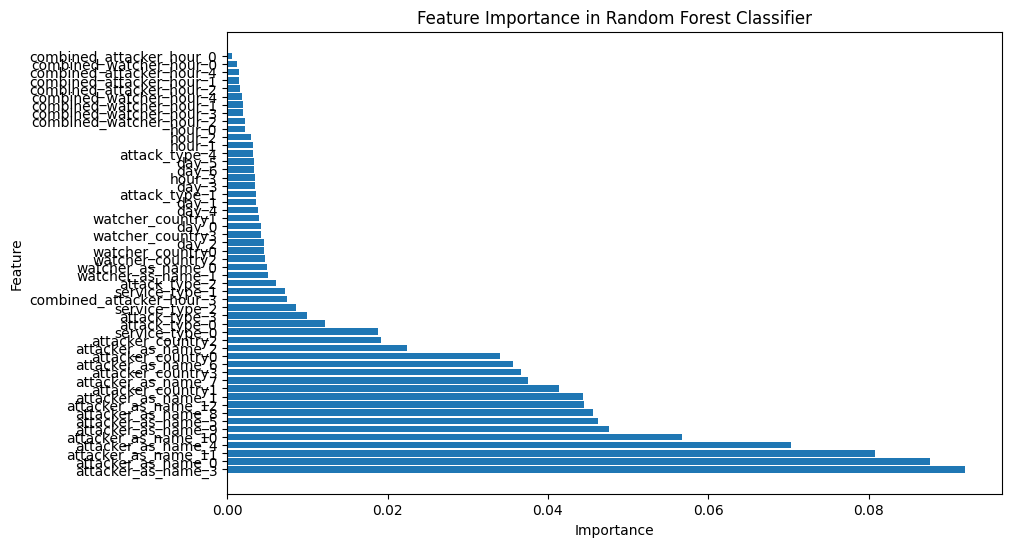

In [ ]:
feature_importance = model2.feature_importances_

feature_names = X_train.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Classifier')
plt.show()

In [ ]:
XX_test = X_test.join(ips_test)

In [ ]:
test_pred = model2.predict(X_test)

## exportar resultados

In [ ]:
XX_test = X_test.join(ips_test)

In [ ]:
result_df = pd.DataFrame({'attacker_ip_enum': XX_test['attacker_ip_enum'], 'label': test_pred})

grouped_df = result_df.groupby('attacker_ip_enum')['label'].mean()

threshold = 0.5
grouped_labels = (grouped_df >= threshold).astype(int)

In [ ]:
grouped_labels

attacker_ip_enum
5         0
7         0
21        0
29        0
33        0
         ..
199947    0
199949    0
199962    0
199964    0
199966    0
Name: label, Length: 49420, dtype: int64

In [ ]:
grouped_labels.sum()

1926

In [ ]:
grouped_labels.to_csv('/content/drive/MyDrive/orga/04 - Organización de Datos/TP2/random_forest.csv')

# Score en Kaggle

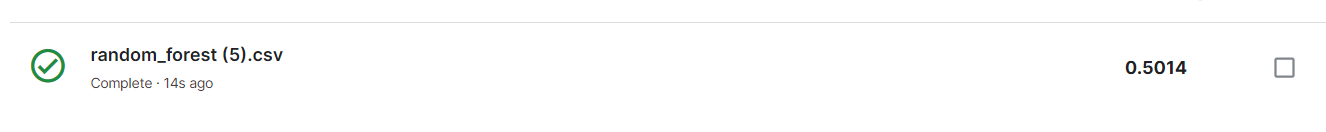